# Assignment 2 - Logistic Regression
Team,

The attached data set is the famous 'Pima Indian Diabetes Dataset' from kaggle originally from UCI (University of California, Irwin campus) repository. Please find below the description copied from Kaggle.

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv("diabetes_null.csv")

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,5,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [26]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

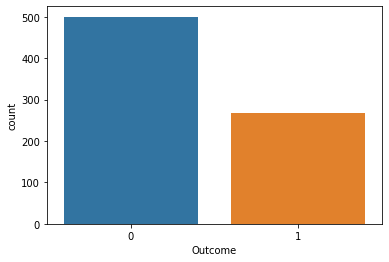

In [27]:
sns.countplot(x=df['Outcome'],data=df)

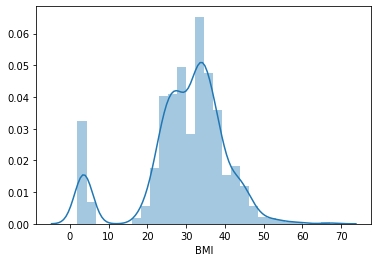

In [28]:
sns.distplot(df['BMI'])

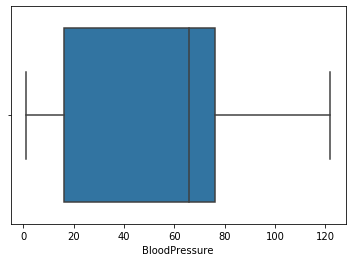

In [29]:
sns.boxplot(df['BloodPressure'])

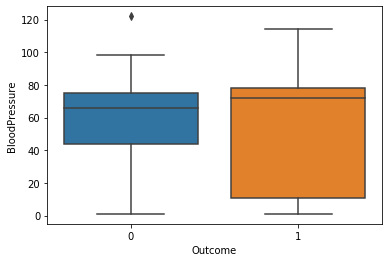

In [30]:
sns.boxplot(y=df['BloodPressure'],x=df['Outcome'])

In [31]:
sns.boxplot(x=df[''])

KeyError: ''

In [32]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [33]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,99.310616,55.706685,25.876155,105.659898,29.865654,0.490439,30.990885,0.348958
std,3.369578,55.115381,29.878852,12.967816,116.862508,10.686049,0.346050,13.281475,0.476951
min,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.100000,3.000000,0.000000
25%,1.000000,72.500000,16.000000,18.000000,21.000000,25.400000,0.253750,23.000000,0.000000
50%,3.000000,113.000000,66.000000,27.000000,71.000000,32.000000,0.382500,28.000000,0.000000
75%,6.000000,138.000000,76.000000,35.000000,151.000000,36.100000,0.647500,38.250000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [35]:
df['Glucose'] = df['Glucose'].fillna(value=99)

In [36]:
df['BloodPressure'] = df['BloodPressure'].fillna(value=55)

In [37]:
df['SkinThickness'] = df['SkinThickness'].fillna(value=25)

In [38]:
df['Insulin'] = df['Insulin'].fillna(value=105)

In [39]:
df['BMI'] = df['BMI'].fillna(value=29)

In [40]:
df.shape

(768, 9)

In [41]:
x= df.drop('Outcome',axis=1)
y= df['Outcome']

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)
# X_train, X_test, y_train, y_test = train_test_split(
# ...     X, y, test_size=0.33, random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
log = LogisticRegression()

In [47]:
log.fit(X_train,y_train)

C:\Users\z028809\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
prediction = log.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score

In [50]:
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

0.7337662337662337
[[86 17]
 [24 27]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       103
           1       0.61      0.53      0.57        51

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154



In [51]:
log.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [52]:
log.intercept_

array([-5.31364429])

In [53]:
log.coef_

array([[ 0.15119113,  0.0108923 , -0.00140296,  0.02422396,  0.00308703,
         0.04397771,  0.8759041 ,  0.00892599]])

In [54]:
prob_prediction = log.predict_proba(X_test)

In [55]:
prediction_border = np.where(prob_prediction[:,0]>=0.4,0,1)
print(accuracy_score(y_test,prediction_border))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

0.7272727272727273
[[86 17]
 [24 27]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       103
           1       0.61      0.53      0.57        51

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154



# prediction_border = np.where(prob_prediction[:,0]>=0.5,0,1)
print(accuracy_score(y_test,prediction_border))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

In [56]:
prediction_border = np.where(prob_prediction[:,0]>=0.55,0,1)
print(accuracy_score(y_test,prediction_border))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

0.7402597402597403
[[86 17]
 [24 27]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       103
           1       0.61      0.53      0.57        51

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154



In [57]:
log.score(X_test,y_test)

0.7337662337662337

In [59]:
%recall(prediction_border)

UsageError: Line magic function `%recall(prediction_border)` not found.
